In [4]:
## 2.3 요약
# 데이터 가져오기
import os
HOUSING_PATH = os.path.join("datasets", "housing")

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


# 중요 특성인 중간소득을 계층 별로 나눠 계층적 샘플링
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

    
# 계층적 샘플링에 사용했던 income_cat 특성 제거하기
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [5]:
# 2.4.1 지리적 데이터 시각화
'''
훈련 세트에 대해서만 탐색을 하겠다.
'''

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

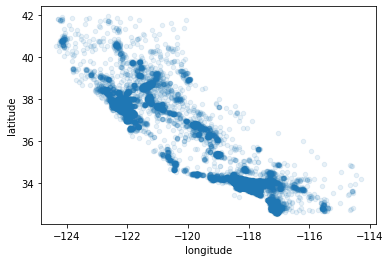

In [7]:
'''
지리 정보(위도와 경도) -> 모든 구역을 산점도로 만들어 데이터를 시각화하면 좋을 것 같음

alpha 옵션(매개변수)를 이용하면, 데이터포인트가 밀집된 영역을 잘 보이게 할 수 있다.
'''

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

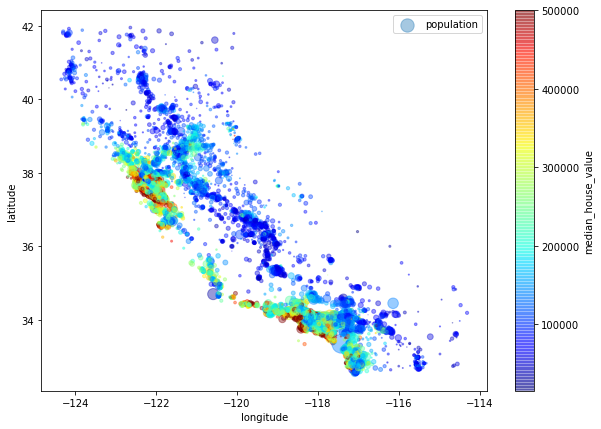

In [17]:
'''
주택 가격을 나타내보자.
원의 반지름 : 구역의 인구 (매개변수 s)
색상 : 가격 (매개변수 c)
미리 정의된 컬러 맵 중 jet를 사용한다. (매개변수 cmap)
'''
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False
)

plt.legend()